No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


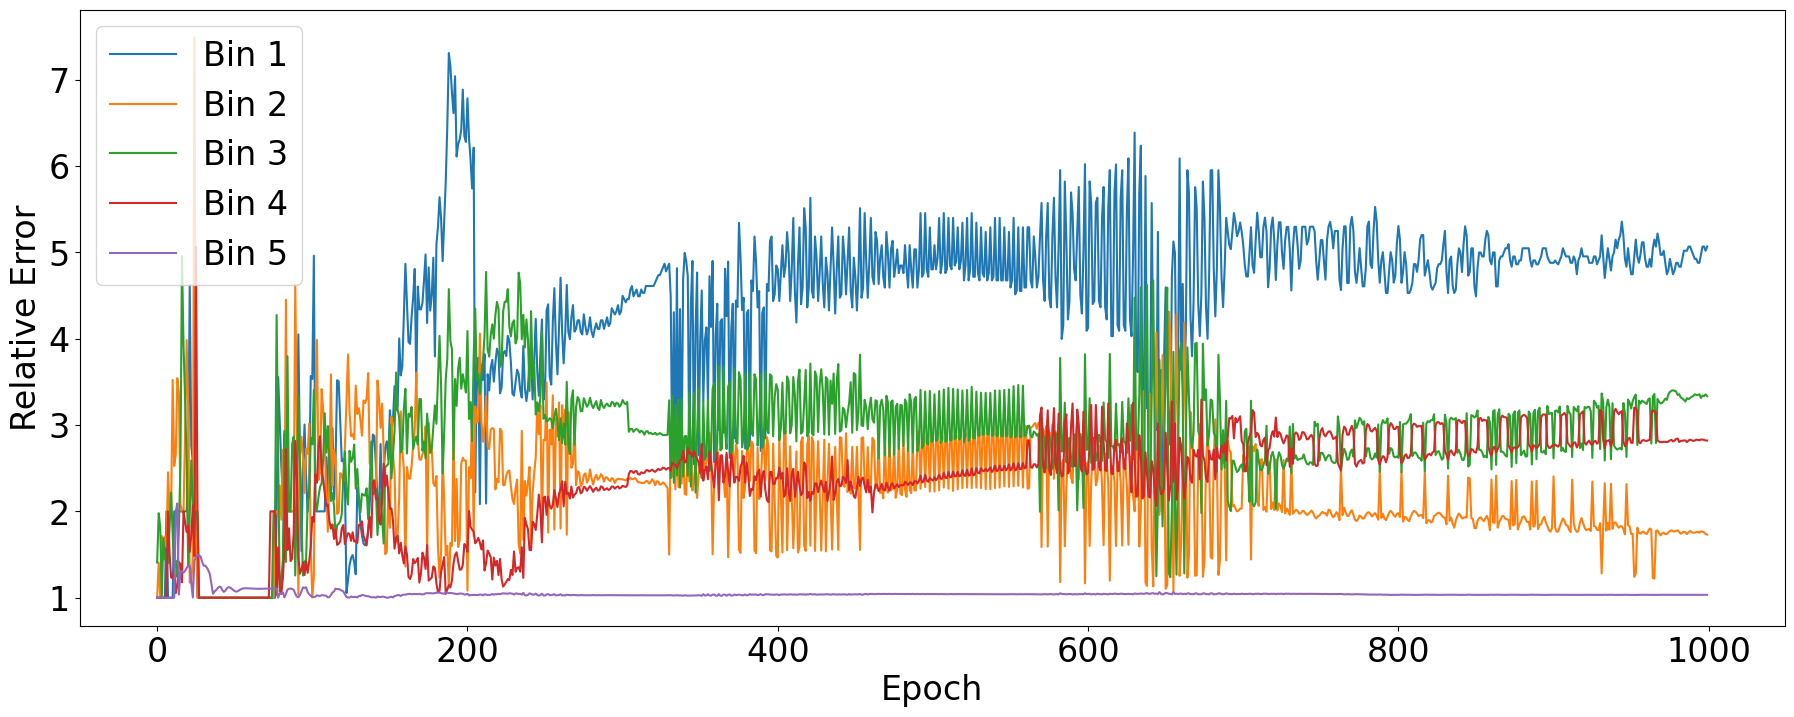

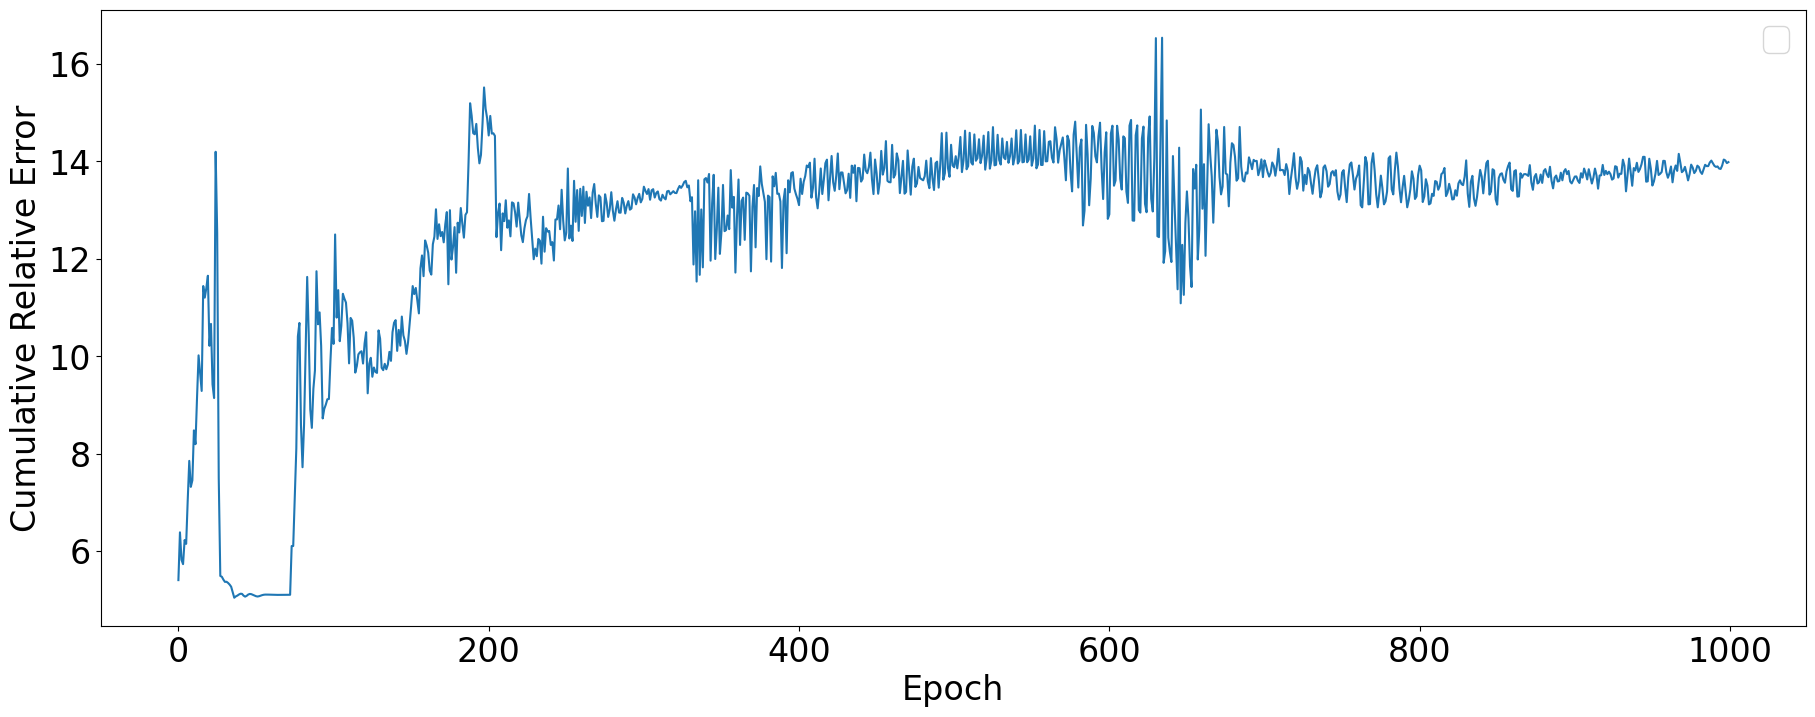

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 24})
with open(
    # "/lustre/fs22/group/atlas/freder/hh/run/tomatos/tomatos_cls_5_preload_fixed_cuts_m5/metadata.json",
    "/lustre/fs22/group/atlas/freder/hh/run/tomatos/tomatos_cls_5_1000_bounded/metadata.json",
    # "/lustre/fs22/group/atlas/freder/hh/run/tomatos/tomatos_cls_5_preload_fixed_cuts_m5_bandwidth_0p1/metadata.json",
    "r",
) as file:
    results = json.load(file)

up = np.array(results["metrics"]["bkg_shape_sys_up"])
down = np.array(results["metrics"]["bkg_shape_sys_down"])
bkg = np.array(results["metrics"]["bkg"])

rel_up = up / bkg
# rel_down=down/bkg
# only up because symmetrized
plt.figure(figsize=(22, 8))
for i in range(5):
    plt.plot(rel_up[:, i], label=f"Bin {i+1}")

# plt.axvline(x=185,color="black",label="Epoch 185")
plt.xlabel("Epoch")
plt.ylabel("Relative Error")
plt.legend()
plt.savefig("/lustre/fs22/group/atlas/freder/hh/run/plots/bkg_shape_sys_rel_error.pdf")
plt.figure(figsize=(22, 8))
plt.plot(np.sum(rel_up, axis=1))
# plt.axvline(x=185,color="black",label="Epoch 185")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Relative Error")
plt.legend()
plt.savefig(
    "/lustre/fs22/group/atlas/freder/hh/run/plots/bkg_shape_sys_rel_error_cumulative.pdf"
)